In [1]:
%matplotlib inline

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Introduction to Machine Learning

## Live Demos

### Spaceship Titanic dataset

In [3]:
passenger_data = pd.read_csv('Data/train.csv', true_values=['True'], false_values=['False'])

In [4]:
passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
passenger_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
passenger_data.PassengerId.sample(20)

8396    8975_02
3467    3732_04
4948    5275_01
3272    3515_02
8542    9122_01
2670    2861_01
7240    7742_02
5388    5756_04
7346    7859_01
2248    2409_01
6005    6357_01
3391    3645_05
7600    8122_02
6119    6456_01
7130    7599_01
723     0765_02
7592    8117_03
1121    1186_04
1161    1228_02
1848    1976_02
Name: PassengerId, dtype: object

In [7]:
passenger_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
passenger_data.HomePlanet.value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [9]:
passenger_data[passenger_data.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [10]:
passenger_data.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [11]:
destinations = passenger_data.Destination.value_counts().sort_values(ascending = True)

In [12]:
destinations

PSO J318.5-22     796
55 Cancri e      1800
TRAPPIST-1e      5915
Name: Destination, dtype: int64

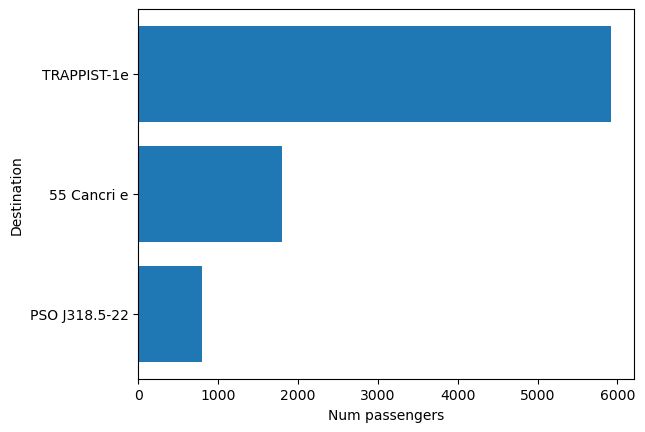

In [13]:
plt.barh(destinations.index, destinations)
plt.xlabel('Num passengers')
plt.ylabel('Destination')
plt.show()

In [14]:
passangers_ids = passenger_data.PassengerId.str.split('_', expand=True)

In [15]:
passangers_ids

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


In [16]:
passangers_ids[0].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: 0, Length: 6217, dtype: int64

In [39]:
num_passengers = passenger_data.PassengerId\
                .str.split('_', expand=True)[0]\
                .value_counts()\
                .value_counts()

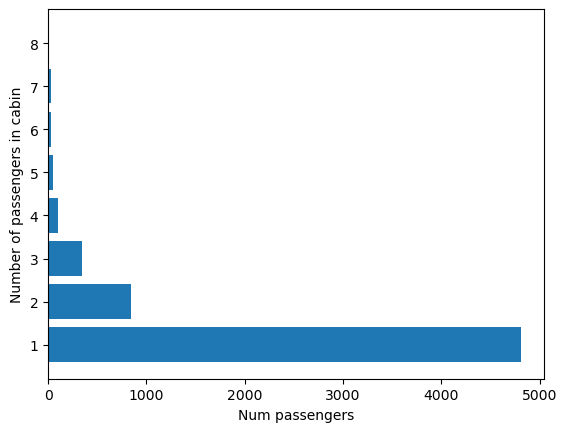

In [40]:
plt.barh(num_passengers.index, num_passengers)
plt.xlabel('Num passengers')
plt.ylabel('Number of passengers in cabin')
plt.show()

In [41]:
passenger_data.Transported.value_counts(dropna=False)

True     4378
False    4315
Name: Transported, dtype: int64

In [107]:
# Separate the target column
passenger_attributes = passenger_data.drop(columns=['Transported']) # x
passenger_labels = passenger_data.Transported # y

### To enable the model to function, each value in the dataset must be a number!

In [108]:
passenger_attributes = passenger_attributes.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [109]:
passenger_attributes.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [110]:
pd.get_dummies(passenger_attributes['HomePlanet'])

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [111]:
passenger_attributes = pd.get_dummies(passenger_attributes, drop_first=True)

In [112]:
passenger_attributes = passenger_attributes.dropna()

In [113]:
passenger_attributes.shape

(7620, 12)

In [114]:
passenger_labels = passenger_labels.loc[passenger_attributes.index]

In [115]:
len(passenger_attributes), len(passenger_labels)

(7620, 7620)

In [134]:
model = LogisticRegression(C=1e9)

In [135]:
model.fit(passenger_attributes, passenger_labels)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [136]:
model.score(passenger_attributes, passenger_labels)

0.7892388451443569

In [137]:
test_passenger_data = pd.read_csv('Data/test.csv')

In [138]:
# Apply same data transformations to the test dataset
test_passenger_attributes = test_passenger_data

test_passenger_attributes = test_passenger_attributes.drop(columns=['PassengerId', 'Name', 'Cabin'])
test_passenger_attributes = pd.get_dummies(test_passenger_attributes, drop_first=True)
test_passenger_attributes= test_passenger_attributes.dropna()


In [139]:
test_passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,0,0,1,0
4271,40.0,0.0,865.0,0.0,3.0,0.0,0,0,0,0,1,0
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0


In [140]:
model.predict(passenger_attributes)

array([ True, False, False, ...,  True, False,  True])

In [141]:
print(classification_report(passenger_labels, model.predict(passenger_attributes)))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79      3789
        True       0.79      0.80      0.79      3831

    accuracy                           0.79      7620
   macro avg       0.79      0.79      0.79      7620
weighted avg       0.79      0.79      0.79      7620



In [142]:
model.coef_

array([[-8.84328705e-05, -1.45704199e-03,  5.54121756e-04,
         5.53082409e-04, -1.98408651e-03, -1.66757950e-03,
         1.81594082e+00,  5.58020144e-01,  1.44697322e+00,
        -3.84629893e-01, -6.42277663e-01, -1.79175244e-02]])

In [143]:
list(zip(passenger_attributes.columns.tolist(), model.coef_[0].tolist()))

[('Age', -8.843287048740964e-05),
 ('RoomService', -0.0014570419863708921),
 ('FoodCourt', 0.0005541217560103471),
 ('ShoppingMall', 0.0005530824085882056),
 ('Spa', -0.0019840865090824723),
 ('VRDeck', -0.0016675794989779729),
 ('HomePlanet_Europa', 1.815940822348513),
 ('HomePlanet_Mars', 0.5580201442457036),
 ('CryoSleep_True', 1.4469732188968298),
 ('Destination_PSO J318.5-22', -0.3846298927797784),
 ('Destination_TRAPPIST-1e', -0.6422776634795424),
 ('VIP_True', -0.017917524421355628)]

In [ ]:
# Create new model with extremely small parameter C. Smaller parameter C means bigger regularisation.

In [145]:
model_2 = LogisticRegression(C=1e-9)

In [146]:
model_2.fit(passenger_attributes, passenger_labels)

LogisticRegression(C=1e-09)

In [148]:
model_2.score(passenger_attributes, passenger_labels)

0.7526246719160105

In [149]:
model_2.coef_

array([[-2.52137344e-06, -3.75334556e-04,  1.45306215e-04,
         2.39715436e-05, -3.89305312e-04, -3.53410277e-04,
         3.47446161e-07,  3.78495341e-08,  6.88461160e-07,
        -1.52117229e-08, -1.76473539e-07, -1.12834574e-08]])

In [153]:
list(zip(passenger_attributes.columns.tolist(), model_2.coef_[0].tolist()))

[('Age', -2.5213734393012253e-06),
 ('RoomService', -0.00037533455556169323),
 ('FoodCourt', 0.0001453062152902322),
 ('ShoppingMall', 2.3971543598033592e-05),
 ('Spa', -0.0003893053121120718),
 ('VRDeck', -0.0003534102768936705),
 ('HomePlanet_Europa', 3.4744616078429724e-07),
 ('HomePlanet_Mars', 3.784953410011722e-08),
 ('CryoSleep_True', 6.884611596547063e-07),
 ('Destination_PSO J318.5-22', -1.521172290921782e-08),
 ('Destination_TRAPPIST-1e', -1.7647353899822498e-07),
 ('VIP_True', -1.1283457443199421e-08)]

In [154]:
# Compare the two models coefs
list(zip(passenger_attributes.columns.tolist(), model.coef_[0].tolist(), model_2.coef_[0].tolist()))

[('Age', -8.843287048740964e-05, -2.5213734393012253e-06),
 ('RoomService', -0.0014570419863708921, -0.00037533455556169323),
 ('FoodCourt', 0.0005541217560103471, 0.0001453062152902322),
 ('ShoppingMall', 0.0005530824085882056, 2.3971543598033592e-05),
 ('Spa', -0.0019840865090824723, -0.0003893053121120718),
 ('VRDeck', -0.0016675794989779729, -0.0003534102768936705),
 ('HomePlanet_Europa', 1.815940822348513, 3.4744616078429724e-07),
 ('HomePlanet_Mars', 0.5580201442457036, 3.784953410011722e-08),
 ('CryoSleep_True', 1.4469732188968298, 6.884611596547063e-07),
 ('Destination_PSO J318.5-22', -0.3846298927797784, -1.521172290921782e-08),
 ('Destination_TRAPPIST-1e', -0.6422776634795424, -1.7647353899822498e-07),
 ('VIP_True', -0.017917524421355628, -1.1283457443199421e-08)]